# Assignment 1: Image Manipulation and Edge Detection

---

Prof. Dr.-Ing. Antje Muntzinger, Hochschule für Technik Stuttgart

antje.muntzinger@hft-stuttgart.de

---

In this notebook, we practice some basic image manipulation techniques in OpenCV including Canny edge detection. These are the foundation of later computer vision applications.

**NOTE:** You may answer in English or German.

In [1]:
# imports
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np 
import cv2

Task 1: Basic Image Manipulation in OpenCV
=

**TODO**: 1a) Load the image 'HFT_Bau1.jpg'. Convert it to a color format of your choice, and display it. **(1.5 points)**

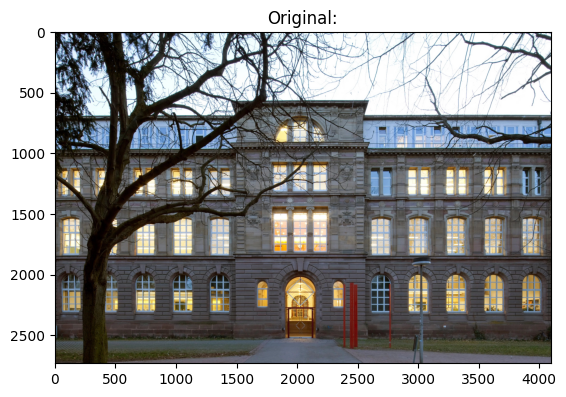

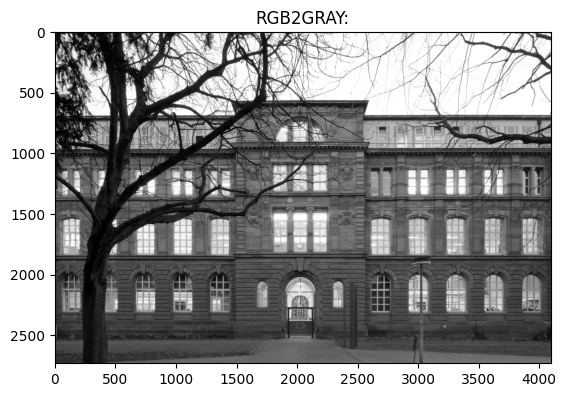

In [2]:
##### TODO: YOUR CODE GOES HERE
import matplotlib.image as mpimg

# Read in the image
image = mpimg.imread('images/HFT_Bau1.jpg')

plt.imshow(image)
plt.title("Original:")
plt.show()
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.title("RGB2GRAY:")
plt.show()

**TODO**: 1b) Color the 10th pixel row of the image in red. Plot the upper left 500x500 pixel image cutout to verify your result. **(2 points)** 

Hint: Indexing starts at 0 in Python! Remember the image origin is in the upper left image corner.

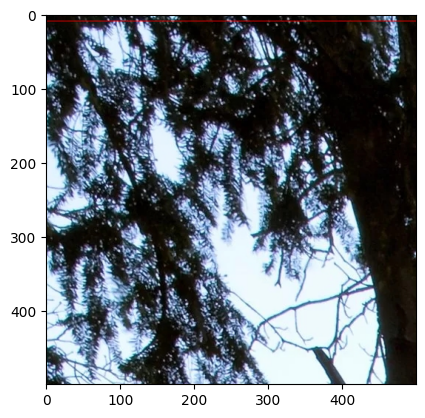

In [3]:
##### TODO: YOUR CODE GOES HERE
image_copy = image.copy()

# using array replacement
#image_copy[9] =  np.full((image_copy.shape[1], 3), (255, 0, 0))
# using line
image_copy = cv2.line(image_copy, (0,9), (image_copy.shape[1]-1,9), color=(255, 0, 0), thickness=1 )
plt.imshow(image_copy[:500, :500])

**TODO**: 1c) Print the color values of the rightmost Pixel in the 9th row, as well as the color values of the leftmost Pixel in the 10th row. **(2 points)** 

In [4]:
##### TODO: YOUR CODE GOES HERE

right_pixel_row9 = image_copy[8, -1]
print("Rightmost pixel in 9th row:", right_pixel_row9)
left_pixel_row10 = image_copy[9, 0]
print("Leftmost pixel in 10th row:", left_pixel_row10)

Rightmost pixel in 9th row: [ 90 162 184]
Leftmost pixel in 10th row: [255   0   0]


**TODO**: 1d) Flatten the color image, i.e., convert it from the 3D array to a 1D array. Find at least two different commands that achieve the desired result. Check your output with `shape`. **(3 points)**

In [5]:
##### TODO: YOUR CODE GOES HERE

# using reshape
img_reshape = image_copy.reshape(-1)
print("Shape of flatten image using .reshape:", img_reshape.shape)

# using flatten
img_flatten = image_copy.flatten()
print("Shape of flatten image using .flatten:", img_flatten.shape )

Shape of flatten image using .reshape: (33583104,)
Shape of flatten image using .flatten: (33583104,)


**TODO**: 1e) As before, print the color values of the rightmost Pixel in the 9th row, as well as the color values of the leftmost Pixel in the 10th row, but use the flattened image now. Verify that the result is the same as before. **(2 points)**

In [6]:
##### TODO: YOUR CODE GOES HERE

# index of rightmost pixel row 9: first pixel in 10th line minus 1; all multiplied by 3 since flatten 1D array uses the color channels in a row ([R, G, B, R, G, B,...])
index_right_pixel_row9_flat = (9*image_copy.shape[1]-1)*3

right_pixel_row9_flat = img_flatten[index_right_pixel_row9_flat : index_right_pixel_row9_flat+3]
print("Rightmost pixel in 9th row of respahed image:", right_pixel_row9_flat)

# index of leftmost pixel in row 10
index_left_pixel_row10_flat = (9*image_copy.shape[1]-0)*3

left_pixel_row10_flat = img_flatten[index_left_pixel_row10_flat : index_left_pixel_row10_flat+3]
print("Leftmost pixel in 10th row:", left_pixel_row10_flat)


Rightmost pixel in 9th row of respahed image: [ 90 162 184]
Leftmost pixel in 10th row: [255   0   0]


**TODO**: 1f) Split the three color channels and display them separately. Can you see from the plotted images which color channel is displayed in which image (without looking at the code), or do the three channels not differ much? Write your answer in the markdown cell below the code. **(2 points)**

(np.float64(-0.5), np.float64(4095.5), np.float64(2732.5), np.float64(-0.5))

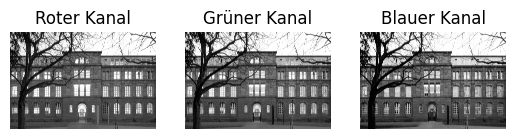

In [7]:
##### TODO: YOUR CODE GOES HERE

img_R, img_G, img_B = cv2.split(image)
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.imshow(img_R, cmap='gray')
ax1.set_title("Roter Kanal")
ax1.axis("off")
ax2.imshow(img_G, cmap='gray')
ax2.set_title("Grüner Kanal")
ax2.axis("off")
ax3.imshow(img_B, cmap='gray')
ax3.set_title("Blauer Kanal")
ax3.axis("off")

**YOUR ANSWER**: 

The red information board to the right of the entrance is clearly visible in the red channel (brighter means color is present).

We can't distinguish the blue and green channels well.

Task 2: Edge Detection
=

**TODO**: 2a) Choose a part of the image that you find interesting for later corner and edge detection. Store the cutout in a new grayscale image. **(1 point)**

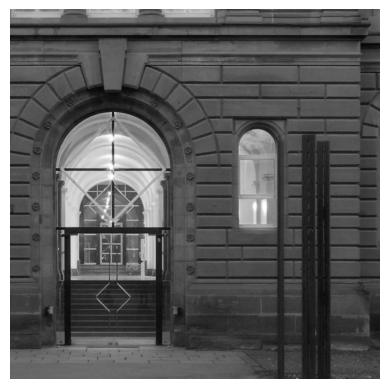

In [8]:
##### TODO: YOUR CODE GOES HERE

# Example: Section of the entrance with information board
cutout_color = image[1800:2600, 1800:2600]

# Convert to grayscale
cutout_gray = cv2.cvtColor(cutout_color, cv2.COLOR_BGR2GRAY)
plt.imshow(cutout_gray, cmap='gray')
plt.axis('off')
plt.show()

**TODO**: 2b) Find a part of the cutout that you think might be difficult to detect edges in with Canny. Mark this part in the grayscale cutout with a red rectangle. Write a short explanation why this could be difficult below. **(2 points)**

Hint: Note that you cannot plot color into a grayscale image. One option is to convert the grayscale image to RGB first, using `COLOR_GRAY2RGB`.

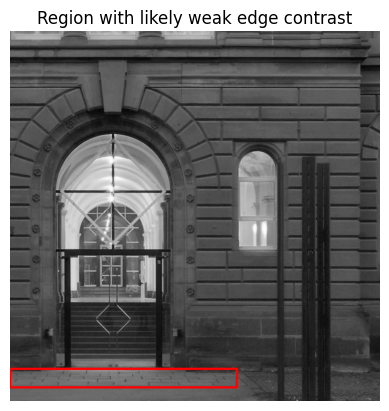

In [9]:
##### TODO: YOUR CODE GOES HERE

# convert gray to RGB to enable the red rectangle
cutout_rgb = cv2.cvtColor(cutout_gray, cv2.COLOR_GRAY2RGB)

# coordinates of the rectangle
top_left = (0, 730)
bottom_right = (490, 770)

# draw the rectangle
cv2.rectangle(cutout_rgb, top_left, bottom_right, color=(255, 0, 0), thickness=3)

# Plot
plt.imshow(cutout_rgb)
plt.title("Region with likely weak edge contrast")
plt.axis('off')
plt.show()


**YOUR ANSWER**: 

The edges within the window are probably difficult to detect since all the colors of the stones are close to the color of the edges.

**TODO**: 2c) Resize the gray cutout to 1/4th of the original size, keeping the aspect ratio. Plot both grayscale images next to each other using Matplotlib's `subplots`. **(2 points)**

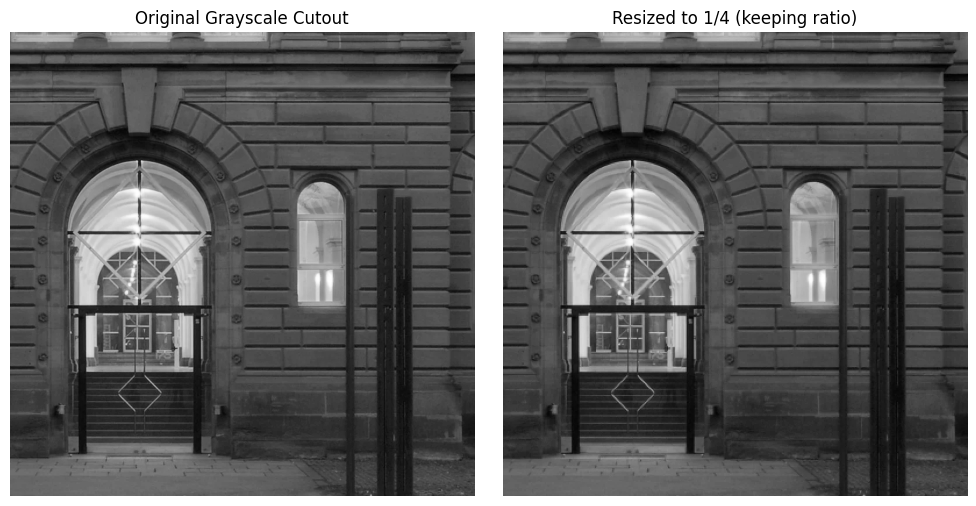

In [10]:
##### TODO: YOUR CODE GOES HERE

# get size of original image
original_height, original_width = cutout_gray.shape

# reduce size to 1/4 of original
resized_gray = cv2.resize(cutout_gray, (original_width // 2, original_height // 2), interpolation=cv2.INTER_AREA)

# Plot both images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(cutout_gray, cmap='gray')
axes[0].set_title("Original Grayscale Cutout")
axes[0].axis('off')

axes[1].imshow(resized_gray, cmap='gray')
axes[1].set_title("Resized to 1/4 (keeping ratio)")
axes[1].axis('off')

plt.tight_layout()
plt.show()

**TODO**: 2d) Apply Gaussian blur with a kernel of size 9 to the resized image and plot the result. **(1 point)**

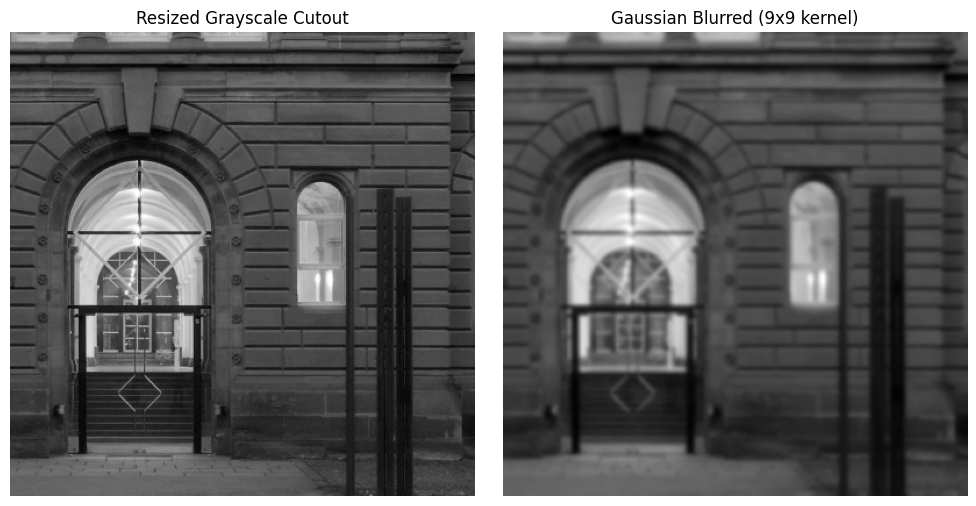

In [11]:
##### TODO: YOUR CODE GOES HERE

# apply Gaussian blur with a kernel size of 9x9
blurred = cv2.GaussianBlur(resized_gray, ksize=(9, 9), sigmaX=0)

# Plot original and blurred images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(resized_gray, cmap='gray')
axes[0].set_title("Resized Grayscale Cutout")
axes[0].axis('off')

axes[1].imshow(blurred, cmap='gray')
axes[1].set_title("Gaussian Blurred (9x9 kernel)")
axes[1].axis('off')

plt.tight_layout()
plt.show()

**TODO**: 2e) Detect the edges in the blurred cutout using Canny edge detector. Adapt the Canny thresholds for an optimal result. Plot the edges in blue into the grayscale cutout. **(3 points)** 

In [13]:
def show_canny_edges(image_gray, threshold1=20, threshold2=60, filter_type='gaussian', ksize=9):
    """
    Applies optional filtering and Canny edge detection to a grayscale image.
    Returns an RGB image with detected edges drawn in blue.

    Parameters:
    - image_gray: Grayscale image (2D NumPy array)
    - threshold1: Lower threshold for Canny
    - threshold2: Upper threshold for Canny
    - filter_type: Type of filter to apply before Canny ('blur', 'gaussian', 'median', or 'none')
    - ksize: Kernel size for the filter (must be odd and >= 3)

    Returns:
    - image_rgb: RGB image with Canny edges overlaid in blue
    """
    # Ensure valid kernel size
    if ksize < 3:
        ksize = 3
    if ksize % 2 == 0:
        ksize += 1

    # Apply selected filter
    if filter_type == 'blur':
        smoothed = cv2.blur(image_gray, (ksize, ksize))
    elif filter_type == 'gaussian':
        smoothed = cv2.GaussianBlur(image_gray, (ksize, ksize), 0)
    elif filter_type == 'median':
        smoothed = cv2.medianBlur(image_gray, ksize)
    elif filter_type is None or filter_type == 'none':
        smoothed = image_gray.copy()
    else:
        raise ValueError(f"Unknown filter_type '{filter_type}'. Use 'blur', 'gaussian', 'median', or 'none'.")

    # Apply Canny edge detection
    edges = cv2.Canny(smoothed, threshold1, threshold2)

    # Overlay edges in blue on original grayscale image
    image_rgb = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2RGB)
    image_rgb[edges == 255] = [0, 0, 255]

    return image_rgb

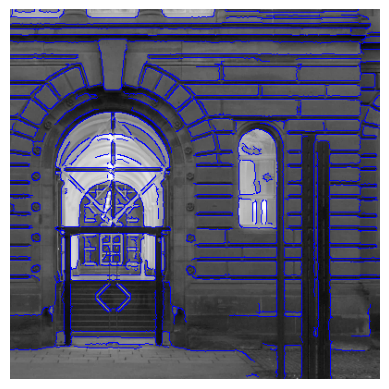

In [15]:
result = show_canny_edges(resized_gray, threshold1=20, threshold2=60, filter_type='gaussian', ksize=9)

import matplotlib.pyplot as plt
plt.imshow(result)
plt.axis('off')
plt.show()

**TODO**: 2f) Check if your prediction of difficulty was correct. Do you see a) real edges that were missed by Canny (false negatives) or b) detected edges that are not there in reality (false positives)? Try to experiment with the Canny thresholds and solve these difficulties. How did you try to solve the difficulties? Write your answer below the code. **(1.5 points)**

**YOUR ANSWER**: 

Yes, the prediction of difficulty was correct: the edges of the floor are not recognized by Canny. The following table gives an overview on the deviations:

| false negatives                                                                        | false positives                                              |
| -------------------------------------------------------------------------------------- | ------------------------------------------------------------ |
| Edges on the floor are not recognized.                                                 | Inside of the windows are edges detected which aren't there. |
| Edges on the wall right and left to the front entry are not recognized in small areas. |                                                              |

Even if we set both thresholds to 0, the edges on the floor are not recognized well. The edges are no straight lines but chaotic/blurred lines. This can be already predicted by checking the gaussian blurred image. To improve the result, we try another blurring filter. The following code tries other types of blurring filter.

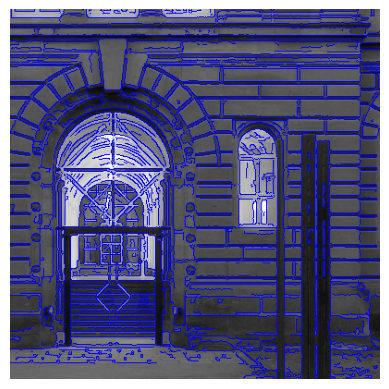

In [21]:
# Gaussian blur with kernel size 3
result = show_canny_edges(resized_gray, threshold1=20, threshold2=60, filter_type='gaussian', ksize=3)

import matplotlib.pyplot as plt
plt.imshow(result)
plt.axis('off')
plt.show()

**YOUR ANSWER**: 

Using a smaller (gaussian) kernel helps with detecting edges in the floor, but adds also a lot of false positives within the window / door. 

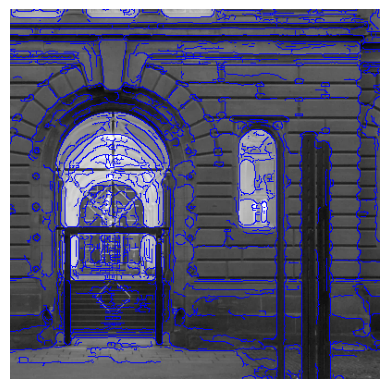

In [25]:
# Median blur with kernel size 9
result = show_canny_edges(resized_gray, threshold1=10, threshold2=30, filter_type='median', ksize=9)

import matplotlib.pyplot as plt
plt.imshow(result)
plt.axis('off')
plt.show()

**YOUR ANSWER**: 

Using a median filter makes the result worse in any aspect.

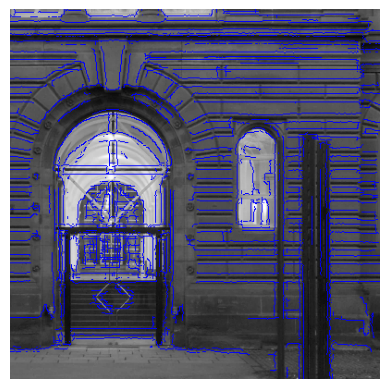

In [28]:
# Blur filter with kernel size 9
result = show_canny_edges(resized_gray, threshold1=20, threshold2=40, filter_type='blur', ksize=9)

import matplotlib.pyplot as plt
plt.imshow(result)
plt.axis('off')
plt.show()

**YOUR ANSWER**: 

Interestingly, a common blur filter is not able to detect the correct edges within the wall, but detects edges "around the real edges". 

**YOUR ANSWER**: 

To sum up: using a gaussian blur filter upfront gives the best result. However, we were not able to tune the thresholds in a way, that the difficult edges within the floor are detected.

Well done, you are now able to apply basic image manipulation techniques as well as Canny edge detection to images in OpenCV! 

Task 3: Theory Questions
=

**TODO**: 3a) What is the problem of applying image derivatives for edge detection in noisy images? What is a possible solution to that problem? Can you give an example in which you often get noise when taking a photo? **(3 points)**

**YOUR ANSWER**: 

Noise is amplified further when applying a derivative on a noisy image. This happens because derivatives emphasize rapid intensity changes as we can see in the following diagram:

![noise amplification](./assets/IMG_CBDE6852DAA6-1.jpeg)

 Source: Script MER_2_RecapFilter_Canny slide 98

A possible solution is to smoothen the image first, e.g. with a gaussian filter or a bilateral filter.

Noisy photos are often taken in low light situations since the camera sensors may increase the ISO sensitivity.

**TODO**: 3b) You are given a 3×3 pixel input image $
\begin{array}{|ccc|}
\hline
 1 & 2 & 1  \\ 
 2 & 2 & 2  \\ 
 3 & 2 & 3  \\ 
\hline   
\end{array}$
and a 3×3 pixel filter $\begin{array}{|ccc|}
\hline
 -1 & 0 & 1  \\ 
 -1 & 0 & 1  \\ 
 -1 & 0 & 1  \\ 
\hline   
\end{array}$. Compute the 3 × 3 pixel result image of the correlation of the filter with the input image. All pixels outside the input image are padded with zeros. **(4.5 points)**

**YOUR ANSWER**: 

$\begin{array}{|ccc|}
\hline
 4 & 0 & -4  \\ 
 6 & 0 & -6  \\ 
 4 & 0 & -4  \\ 
\hline   
\end{array}$

**TODO**: 3c) What patterns does this special filter respond to? How can you see this in the result from 3b)? **(2 points)**

**YOUR ANSWER**: 

It is a derivate filter in x direction.

**TODO**: 3d) Please calculate the result using the settings from task 3b), but with convolution instead of correlation. **(4.5 points)**

**YOUR ANSWER**: 

$\begin{array}{|ccc|}
\hline
 -4 & 0 & 4  \\ 
 -6 & 0 & 6  \\ 
 -4 & 0 & 4  \\ 
\hline   
\end{array}$


In [ ]:
# save as pdf (potentially adapt filename)
!jupyter nbconvert --to webpdf --allow-chromium-download Project_OpenCV_Edges_starter.ipynb